In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Cleaned_Dataset_SF.csv',index_col='Unnamed: 0')
data.head(3)

,hhld_id,drvr_cnt,veh_cnt,min_age,hoh_age,max_age,avg_age,min_mon_lic,hoh_mon_lic,max_mon_lic,avg_mon_lic,cnt_yth,cnt_female,cnt_male,cnt_married,cnt_single,hoh_married,cnt_auto,cnt_mtrcyc,avg_majr_viol,cnt_majr_viol,cnt_minr_viol,avg_minr_viol,cnt_lic_susp,curnt_insurer,time_w_carr,inforce_ind,prior_bi,fire_ind,homeowner_ind,veh_lease_cnt,veh_own_cnt,monthly_pay_ind,veh_w_coll_cnt,veh_w_comp_cnt,veh_w_ers_cnt,curnt_bi_low,curnt_bi_upp,credit_score,zipcode,premium,loss_amount,loss_ratio,fault_claims,not_at_fault_claims,future_clm_ind
0,15937,2,1,43.790,51.366,51.366,47.578,333.480,424.394,424.394,378.937,0,2,0,1,1,True,1,0,0.0,0,0,0.0,0,PROGRESSIVE,3.0,1,25000.0,0,0,0,0,0,1,1,1,100,100,825.949,35741,133.6,0.0,0.0,1.0,1.0,0
1,13778,1,1,35.645,35.645,35.645,35.645,235.736,235.736,235.736,235.736,0,0,1,0,1,False,1,0,0.0,0,0,0.0,0,OTHER,1.5,1,25000.0,1,1,0,0,0,1,1,0,25,25,684.650,87884,145.8,0.0,0.0,0.0,0.0,0
2,16063,1,1,16.000,16.000,16.000,16.000,0.000,0.000,0.000,0.000,1,1,0,0,1,False,1,0,0.0,0,2,2.0,0,FARMERS,5.0,1,50000.0,0,1,0,0,0,1,1,1,100,100,596.318,81525,167.0,0.0,0.0,0.0,0.0,0


0    19131
1      869
Name: future_clm_ind, dtype: int64

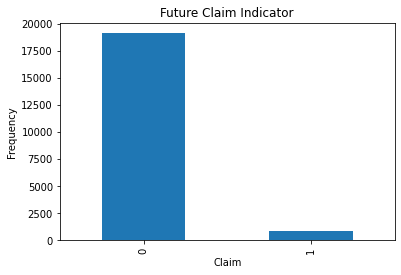

In [ ]:
pd.value_counts(data['future_clm_ind']).plot.bar()
plt.title('Future Claim Indicator')
plt.xlabel('Claim')
plt.ylabel('Frequency')
data['future_clm_ind'].value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df =data[['drvr_cnt', 'min_age', 'max_age', 'min_mon_lic', 'max_mon_lic',
       'cnt_yth', 'cnt_female', 'cnt_male', 'cnt_married', 'cnt_single',
       'cnt_mtrcyc', 'cnt_majr_viol', 'cnt_minr_viol', 'cnt_lic_susp',
       'time_w_carr', 'inforce_ind', 'fire_ind', 'homeowner_ind',
       'veh_lease_cnt', 'veh_own_cnt', 'monthly_pay_ind', 'veh_w_comp_cnt',
       'veh_w_ers_cnt', 'curnt_bi_upp', 'credit_score', 'premium',
       'fault_claims', 'not_at_fault_claims', 'future_clm_ind']]

In [ ]:
X = np.array(df)
y = np.array(data.iloc[:, data.columns == 'future_clm_ind'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (20000, 29)
Shape of y: (20000, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (14000, 29)
Number transactions y_train dataset:  (14000, 1)
Number transactions X_test dataset:  (6000, 29)
Number transactions y_test dataset:  (6000, 1)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [599]
Before OverSampling, counts of label '0': [13401] 

After OverSampling, the shape of train_X: (26802, 29)
After OverSampling, the shape of train_y: (26802,) 

After OverSampling, counts of label '1': 13401


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '0': 13401


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   15.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [ ]:
clf.best_params_

{'C': 9.0}

In [ ]:
lr1 = LogisticRegression(C=9,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=5,
                   warm_start=False)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 100.0%


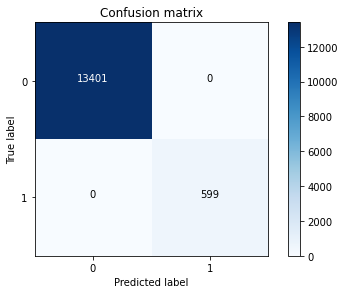

In [ ]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 100.0%


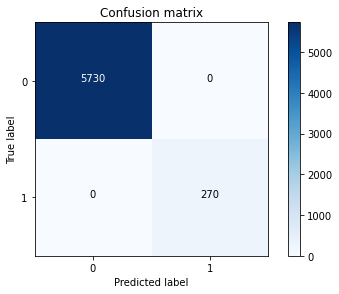

In [ ]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


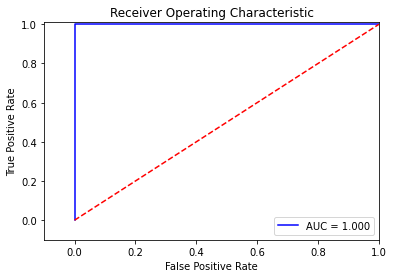

In [ ]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc

1.0